In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
norm = pd.read_csv('normal_light_results.csv')
cont = pd.read_csv('controlled_light_results.csv')

In [42]:
data_norm = norm.drop(['left_queue_first_color', 'left_queue_direction', 'right_queue_first_color', 'right_queue_direction'], axis=1)
data_cont = cont.drop(['left_queue_first_color', 'left_queue_direction', 'right_queue_first_color', 'right_queue_direction'], axis=1)

In [44]:
data_norm

,Unnamed: 0,left_queue_avgs_avg_waiting_times,left_queue_avgs_avg_green_waiting_times,left_queue_avgs_avg_queue_length,left_queue_avgs_drivers_served,left_queue_avgs_no_stop_drivers,left_queue_avg_queue_length,left_queue_avg_cycle_wait,right_queue_avgs_avg_waiting_times,right_queue_avgs_avg_green_waiting_times,right_queue_avgs_avg_queue_length,right_queue_avgs_drivers_served,right_queue_avgs_no_stop_drivers,right_queue_avg_queue_length,right_queue_avg_cycle_wait
0,low low,9.981983,2.078693,0.910804,359.666667,28.850000,1.602210,0.659341,10.239503,2.156013,0.960435,359.633333,26.633000,1.784530,0.633333
1,low mid,10.128736,2.138503,0.957229,363.133333,27.563000,1.535912,0.549451,20.866034,4.598814,3.313034,594.666667,11.060667,5.834254,4.122222
2,low high,10.038675,2.130135,0.937868,363.033333,27.355667,1.375691,0.450549,45.531433,5.733159,8.099220,641.600000,4.670667,13.160221,11.311111
3,mid mid,21.334175,4.544965,3.397425,597.166667,11.356333,3.944751,2.274725,22.605572,4.567511,3.639512,593.433333,11.306667,3.596685,1.933333
4,mid high,21.255852,4.561314,3.384980,595.100000,11.023667,4.182320,2.549451,48.906516,5.739902,8.726813,644.566667,4.422333,5.928177,4.133333
5,high high,38.781323,5.601645,6.768960,645.966667,5.678000,6.795580,4.912088,49.384344,5.790367,8.823194,644.333333,4.158333,7.861878,6.022222


In [46]:
data_cont

,Unnamed: 0,left_queue_avgs_avg_waiting_times,left_queue_avgs_avg_green_waiting_times,left_queue_avgs_avg_queue_length,left_queue_avgs_drivers_served,left_queue_avgs_no_stop_drivers,left_queue_avg_queue_length,left_queue_avg_cycle_wait,right_queue_avgs_avg_waiting_times,right_queue_avgs_avg_green_waiting_times,right_queue_avgs_avg_queue_length,right_queue_avgs_drivers_served,right_queue_avgs_no_stop_drivers,right_queue_avg_queue_length,right_queue_avg_cycle_wait
0,low low,10.004514,2.090684,0.914825,359.200000,29.162333,1.668571,0.602273,10.377843,2.239062,0.988474,364.100000,27.039667,1.765714,0.551724
1,low mid,10.673708,2.217034,0.988843,355.300000,26.490000,1.456647,0.425287,16.732201,4.596148,2.637400,597.533333,13.063667,3.445087,1.720930
2,low high,11.290431,2.341756,1.054932,365.600000,25.232333,1.606936,0.551724,23.126669,5.760060,4.034254,655.800000,7.495333,4.387283,2.546512
3,mid mid,19.390974,4.868224,3.083840,597.866667,11.033667,4.664740,2.908046,19.613388,4.937497,3.113904,598.500000,10.517667,3.271676,1.662791
4,mid high,25.419818,5.157805,4.090568,602.000000,8.836667,4.368421,2.593023,32.858795,6.248312,5.862433,653.333333,4.765000,6.017544,4.188235
5,high high,42.169823,6.357765,7.468929,657.133333,3.821333,17.368421,15.372093,41.271254,6.215794,7.262222,644.133333,4.242333,18.052632,16.082353


In [222]:
data_norm['avg_wait_time'] = (data_norm['left_queue_avgs_avg_waiting_times'] + data_norm['right_queue_avgs_avg_waiting_times'])/2
data_norm['avg_green_wait_time'] = (data_norm['left_queue_avgs_avg_green_waiting_times'] + data_norm['right_queue_avgs_avg_green_waiting_times'])/2
data_norm['avg_queue_length'] = (data_norm['left_queue_avgs_avg_queue_length'] + data_norm['right_queue_avgs_avg_queue_length'])/2
data_norm['avg_drivers_served'] = (data_norm['left_queue_avgs_drivers_served'] + data_norm['right_queue_avgs_drivers_served'])/2
data_norm['avg_no_stop_drivers'] = (data_norm['left_queue_avgs_no_stop_drivers'] + data_norm['right_queue_avgs_no_stop_drivers'])/2
data_norm['avg_queue_length'] = (data_norm['left_queue_avg_queue_length'] + data_norm['right_queue_avg_queue_length'])/2
data_norm['avg_cycle_wait'] = (data_norm['left_queue_avg_cycle_wait'] + data_norm['right_queue_avg_cycle_wait'])/2
data_norm.rename(columns={'Unnamed: 0':"case"}, inplace=True)
data_norm['case'] = data_norm['case'].map(lambda x: x.replace(' ', '-'))

data_norm

,case,left_queue_avgs_avg_waiting_times,left_queue_avgs_avg_green_waiting_times,left_queue_avgs_avg_queue_length,left_queue_avgs_drivers_served,left_queue_avgs_no_stop_drivers,left_queue_avg_queue_length,left_queue_avg_cycle_wait,right_queue_avgs_avg_waiting_times,right_queue_avgs_avg_green_waiting_times,...,right_queue_avgs_drivers_served,right_queue_avgs_no_stop_drivers,right_queue_avg_queue_length,right_queue_avg_cycle_wait,avg_wait_time,avg_green_wait_time,avg_queue_length,avg_drivers_served,avg_no_stop_drivers,avg_cycle_wait
0,low-low,9.981983,2.078693,0.910804,359.666667,28.850000,1.602210,0.659341,10.239503,2.156013,...,359.633333,26.633000,1.784530,0.633333,10.110743,2.117353,1.693370,359.650000,27.741500,0.646337
1,low-mid,10.128736,2.138503,0.957229,363.133333,27.563000,1.535912,0.549451,20.866034,4.598814,...,594.666667,11.060667,5.834254,4.122222,15.497385,3.368659,3.685083,478.900000,19.311833,2.335836
2,low-high,10.038675,2.130135,0.937868,363.033333,27.355667,1.375691,0.450549,45.531433,5.733159,...,641.600000,4.670667,13.160221,11.311111,27.785054,3.931647,7.267956,502.316667,16.013167,5.880830
3,mid-mid,21.334175,4.544965,3.397425,597.166667,11.356333,3.944751,2.274725,22.605572,4.567511,...,593.433333,11.306667,3.596685,1.933333,21.969873,4.556238,3.770718,595.300000,11.331500,2.104029
4,mid-high,21.255852,4.561314,3.384980,595.100000,11.023667,4.182320,2.549451,48.906516,5.739902,...,644.566667,4.422333,5.928177,4.133333,35.081184,5.150608,5.055249,619.833333,7.723000,3.341392
5,high-high,38.781323,5.601645,6.768960,645.966667,5.678000,6.795580,4.912088,49.384344,5.790367,...,644.333333,4.158333,7.861878,6.022222,44.082833,5.696006,7.328729,645.150000,4.918167,5.467155


In [224]:
data_cont['avg_wait_time'] = (data_cont['left_queue_avgs_avg_waiting_times'] + data_cont['right_queue_avgs_avg_waiting_times'])/2
data_cont['avg_green_wait_time'] = (data_cont['left_queue_avgs_avg_green_waiting_times'] + data_cont['right_queue_avgs_avg_green_waiting_times'])/2
data_cont['avg_queue_length'] = (data_cont['left_queue_avgs_avg_queue_length'] + data_cont['right_queue_avgs_avg_queue_length'])/2
data_cont['avg_drivers_served'] = (data_cont['left_queue_avgs_drivers_served'] + data_cont['right_queue_avgs_drivers_served'])/2
data_cont['avg_no_stop_drivers'] = (data_cont['left_queue_avgs_no_stop_drivers'] + data_cont['right_queue_avgs_no_stop_drivers'])/2
data_cont['avg_queue_length'] = (data_cont['left_queue_avg_queue_length'] + data_cont['right_queue_avg_queue_length'])/2
data_cont['avg_cycle_wait'] = (data_cont['left_queue_avg_cycle_wait'] + data_cont['right_queue_avg_cycle_wait'])/2
data_cont.rename(columns={'Unnamed: 0':"case"}, inplace=True)
data_cont['case'] = data_cont['case'].map(lambda x: x.replace(' ', '-'))

data_cont

,case,left_queue_avgs_avg_waiting_times,left_queue_avgs_avg_green_waiting_times,left_queue_avgs_avg_queue_length,left_queue_avgs_drivers_served,left_queue_avgs_no_stop_drivers,left_queue_avg_queue_length,left_queue_avg_cycle_wait,right_queue_avgs_avg_waiting_times,right_queue_avgs_avg_green_waiting_times,...,right_queue_avgs_drivers_served,right_queue_avgs_no_stop_drivers,right_queue_avg_queue_length,right_queue_avg_cycle_wait,avg_wait_time,avg_green_wait_time,avg_queue_length,avg_drivers_served,avg_no_stop_drivers,avg_cycle_wait
0,low-low,10.004514,2.090684,0.914825,359.200000,29.162333,1.668571,0.602273,10.377843,2.239062,...,364.100000,27.039667,1.765714,0.551724,10.191178,2.164873,1.717143,361.650000,28.101000,0.576998
1,low-mid,10.673708,2.217034,0.988843,355.300000,26.490000,1.456647,0.425287,16.732201,4.596148,...,597.533333,13.063667,3.445087,1.720930,13.702954,3.406591,2.450867,476.416667,19.776833,1.073109
2,low-high,11.290431,2.341756,1.054932,365.600000,25.232333,1.606936,0.551724,23.126669,5.760060,...,655.800000,7.495333,4.387283,2.546512,17.208550,4.050908,2.997110,510.700000,16.363833,1.549118
3,mid-mid,19.390974,4.868224,3.083840,597.866667,11.033667,4.664740,2.908046,19.613388,4.937497,...,598.500000,10.517667,3.271676,1.662791,19.502181,4.902861,3.968208,598.183333,10.775667,2.285418
4,mid-high,25.419818,5.157805,4.090568,602.000000,8.836667,4.368421,2.593023,32.858795,6.248312,...,653.333333,4.765000,6.017544,4.188235,29.139307,5.703058,5.192982,627.666667,6.800833,3.390629
5,high-high,42.169823,6.357765,7.468929,657.133333,3.821333,17.368421,15.372093,41.271254,6.215794,...,644.133333,4.242333,18.052632,16.082353,41.720538,6.286779,17.710526,650.633333,4.031833,15.727223


In [392]:
def addlabelsleft(x,y):
    for i in range(len(x)):
        plt.text(i-0.2, 1.2+y[i]//2, y[i], ha = 'center')

def addlabelsright(x,y):
    for i in range(len(x)):
        plt.text(i+0.2, 1.2+y[i]//2, y[i], ha = 'center')

Text(0.5, 1.0, 'Ogólne średnie czasy oczekiwania kierowców')

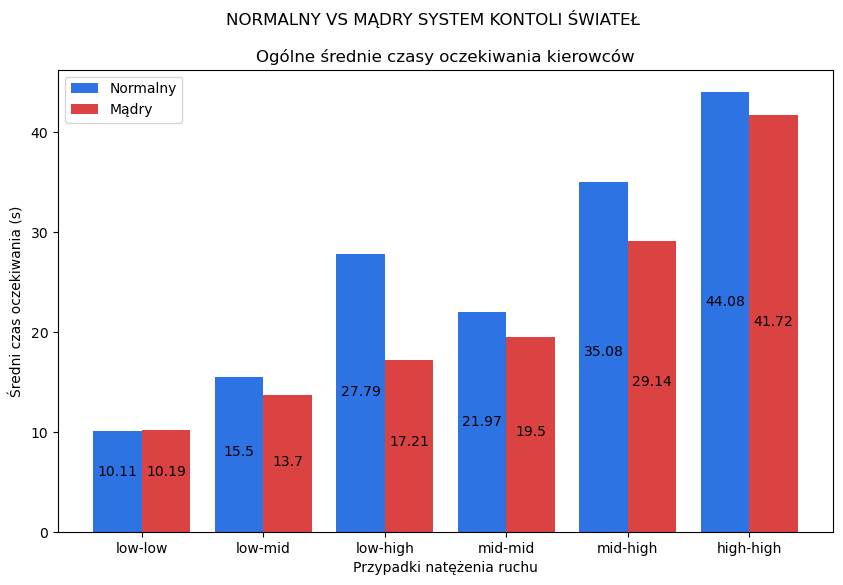

In [388]:
X_axis = np.arange(len(data_norm['case']))

plt.figure(figsize=(10,6))
plt.bar(X_axis-0.2, data_norm['avg_wait_time'], width=0.4, label='Normalny', color='#2d73e3')
plt.bar(X_axis+0.2, data_cont['avg_wait_time'], width=0.4, label='Mądry', color='#db4242')

plt.legend()
plt.xticks(X_axis, data_norm['case']) 
addlabelsleft(X_axis, data_norm['avg_wait_time'].round(2))
addlabelsright(X_axis, data_cont['avg_wait_time'].round(2))

plt.xlabel("Przypadki natężenia ruchu") 
plt.ylabel("Średni czas oczekiwania (s)") 
plt.suptitle("NORMALNY VS MĄDRY SYSTEM KONTOLI ŚWIATEŁ")
plt.title("Ogólne średnie czasy oczekiwania kierowców")

Text(0.5, 1.0, 'Różnica pomiędzy średnim czasem oczekiwania lewej i prawej kolejki')

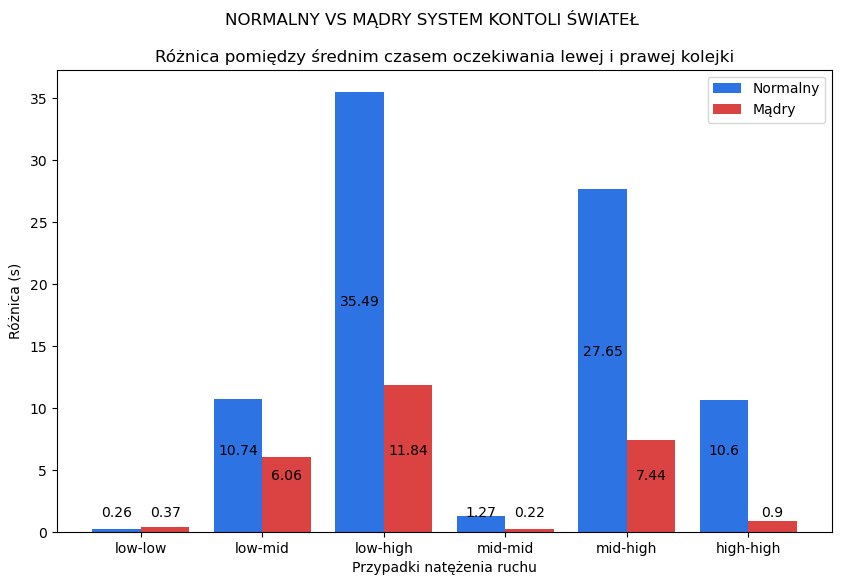

In [394]:
X_axis = np.arange(len(data_norm['case']))

plt.figure(figsize=(10,6))
plt.bar(X_axis-0.2, abs(data_norm['left_queue_avgs_avg_waiting_times']-data_norm['right_queue_avgs_avg_waiting_times']), width=0.4, label='Normalny', color='#2d73e3')
plt.bar(X_axis+0.2, abs(data_cont['left_queue_avgs_avg_waiting_times']-data_cont['right_queue_avgs_avg_waiting_times']), width=0.4, label='Mądry', color='#db4242')

plt.legend()
plt.xticks(X_axis, data_norm['case']) 
addlabelsleft(X_axis, abs(data_norm['left_queue_avgs_avg_waiting_times']-data_norm['right_queue_avgs_avg_waiting_times']).round(2))
addlabelsright(X_axis, abs(data_cont['left_queue_avgs_avg_waiting_times']-data_cont['right_queue_avgs_avg_waiting_times']).round(2))

plt.xlabel("Przypadki natężenia ruchu") 
plt.ylabel("Różnica (s)") 
plt.suptitle("NORMALNY VS MĄDRY SYSTEM KONTOLI ŚWIATEŁ")
plt.title("Różnica pomiędzy średnim czasem oczekiwania lewej i prawej kolejki")

Text(0.5, 1.0, 'Średnie długości kolejek')

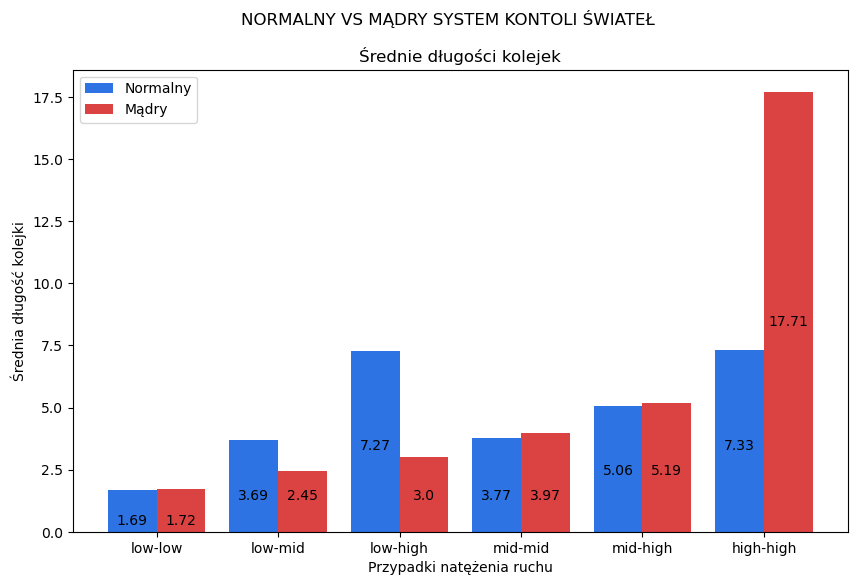

In [284]:
X_axis = np.arange(len(data_norm['case']))

plt.figure(figsize=(10,6))
plt.bar(X_axis-0.2, data_norm['avg_queue_length'], width=0.4, label='Normalny', color='#2d73e3')
plt.bar(X_axis+0.2, data_cont['avg_queue_length'], width=0.4, label='Mądry', color='#db4242')

plt.legend()
plt.xticks(X_axis, data_norm['case']) 
addlabelsleft(X_axis, data_norm['avg_queue_length'].round(2))
addlabelsright(X_axis, data_cont['avg_queue_length'].round(2))

plt.xlabel("Przypadki natężenia ruchu") 
plt.ylabel("Średnia długość kolejki") 
plt.suptitle("NORMALNY VS MĄDRY SYSTEM KONTOLI ŚWIATEŁ")
plt.title("Średnie długości kolejek")

Text(0.5, 1.0, 'Różnica w średnich długościach lewej i prawej kolejki')

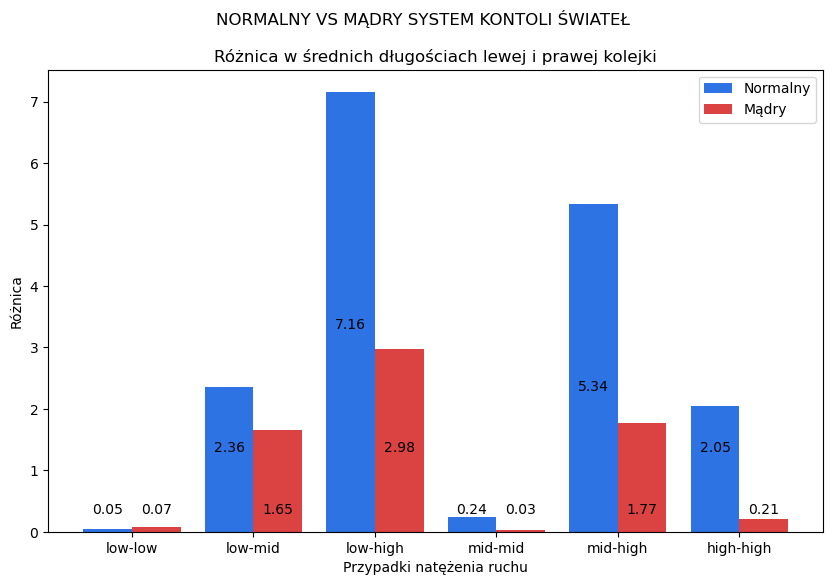

In [282]:
X_axis = np.arange(len(data_norm['case']))

plt.figure(figsize=(10,6))
plt.bar(X_axis-0.2, abs(data_norm['left_queue_avgs_avg_queue_length']-data_norm['right_queue_avgs_avg_queue_length']), width=0.4, label='Normalny', color='#2d73e3')
plt.bar(X_axis+0.2, abs(data_cont['left_queue_avgs_avg_queue_length']-data_cont['right_queue_avgs_avg_queue_length']), width=0.4, label='Mądry', color='#db4242')

plt.legend()
plt.xticks(X_axis, data_norm['case']) 
addlabelsleft(X_axis, abs(data_norm['left_queue_avgs_avg_queue_length']-data_norm['right_queue_avgs_avg_queue_length']).round(2))
addlabelsright(X_axis, abs(data_cont['left_queue_avgs_avg_queue_length']-data_cont['right_queue_avgs_avg_queue_length']).round(2))

plt.xlabel("Przypadki natężenia ruchu") 
plt.ylabel("Różnica") 
plt.suptitle("NORMALNY VS MĄDRY SYSTEM KONTOLI ŚWIATEŁ")
plt.title("Różnica w średnich długościach lewej i prawej kolejki")

Text(0.5, 1.0, 'Średni % kierowców czekających ponad 1 cykl świateł')

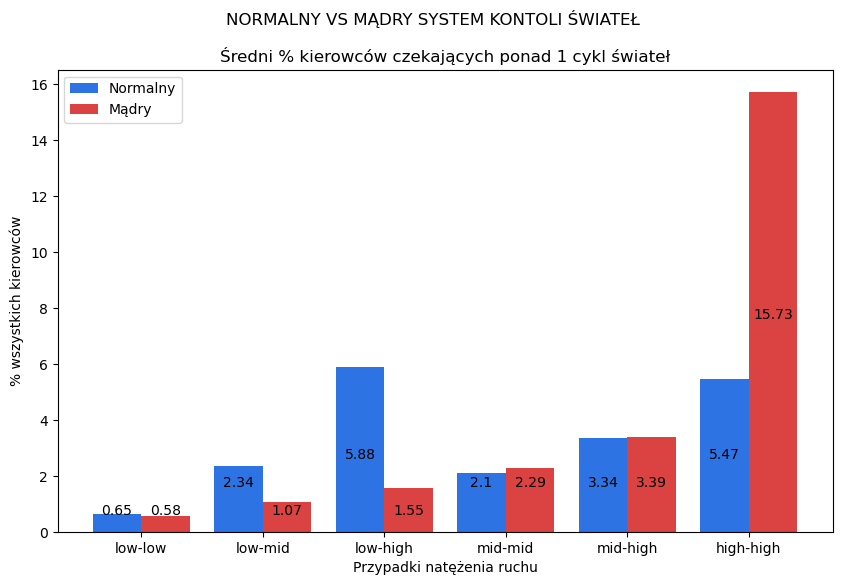

In [296]:
X_axis = np.arange(len(data_norm['case']))

plt.figure(figsize=(10,6))
plt.bar(X_axis-0.2, data_norm['avg_cycle_wait'], width=0.4, label='Normalny', color='#2d73e3')
plt.bar(X_axis+0.2, data_cont['avg_cycle_wait'], width=0.4, label='Mądry', color='#db4242')

plt.legend()
plt.xticks(X_axis, data_norm['case']) 
addlabelsleft(X_axis, data_norm['avg_cycle_wait'].round(2))
addlabelsright(X_axis, data_cont['avg_cycle_wait'].round(2))

plt.xlabel("Przypadki natężenia ruchu") 
plt.ylabel("% wszystkich kierowców") 
plt.suptitle("NORMALNY VS MĄDRY SYSTEM KONTOLI ŚWIATEŁ")
plt.title("Średni % kierowców czekających ponad 1 cykl świateł")

Text(0.5, 1.0, 'Średnie długości kolejek')

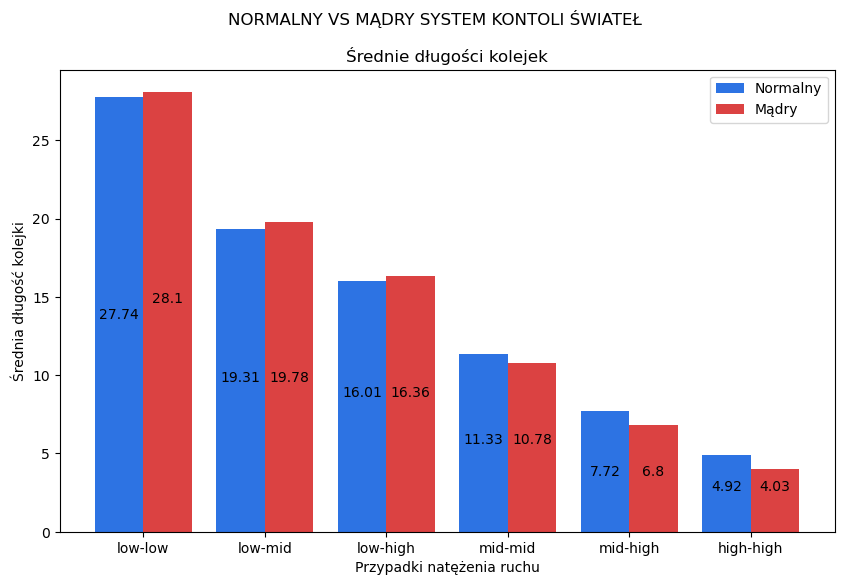

In [344]:
X_axis = np.arange(len(data_norm['case']))

plt.figure(figsize=(10,6))
plt.bar(X_axis-0.2, data_norm['avg_no_stop_drivers'], width=0.4, label='Normalny', color='#2d73e3')
plt.bar(X_axis+0.2, data_cont['avg_no_stop_drivers'], width=0.4, label='Mądry', color='#db4242')

plt.legend()
plt.xticks(X_axis, data_norm['case']) 
addlabelsleft(X_axis, data_norm['avg_no_stop_drivers'].round(2))
addlabelsright(X_axis, data_cont['avg_no_stop_drivers'].round(2))

plt.xlabel("Przypadki natężenia ruchu") 
plt.ylabel("Średnia długość kolejki") 
plt.suptitle("NORMALNY VS MĄDRY SYSTEM KONTOLI ŚWIATEŁ")
plt.title("Średnie długości kolejek")

In [310]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

Text(0.5, 1.0, 'Ilość przypadków natężenia ruchu, kiedy podczas godziny w danym systemie\n przejechało więcej kierowców niż w przeciwnym')

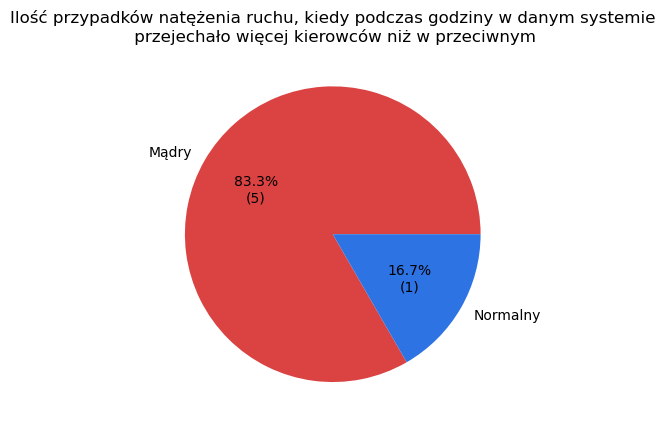

In [340]:
plt.pie([5,1], labels=['Mądry', 'Normalny'], colors=['#db4242', '#2d73e3'], autopct=lambda pct: func(pct, [6,1]))
plt.title("Ilość przypadków natężenia ruchu, kiedy podczas godziny w danym systemie\n przejechało więcej kierowców niż w przeciwnym")

In [208]:
data_norm.columns

Index(['case', 'left_queue_avgs_avg_waiting_times',
       'left_queue_avgs_avg_green_waiting_times',
       'left_queue_avgs_avg_queue_length', 'left_queue_avgs_drivers_served',
       'left_queue_avgs_no_stop_drivers', 'left_queue_avg_queue_length',
       'left_queue_avg_cycle_wait', 'right_queue_avgs_avg_waiting_times',
       'right_queue_avgs_avg_green_waiting_times',
       'right_queue_avgs_avg_queue_length', 'right_queue_avgs_drivers_served',
       'right_queue_avgs_no_stop_drivers', 'right_queue_avg_queue_length',
       'right_queue_avg_cycle_wait', 'avg_wait_time', 'avg_green_wait_time',
       'avg_queue_length', 'avg_drivers_served', 'avg_no_stop_drivers',
       'avg_cycle_wait'],
      dtype='object')

In [348]:
data_norm['avg_wait_time'].mean()

25.75451199990269

In [350]:
data_cont['avg_wait_time'].mean()

21.910784672383517

Text(0.5, 1.0, 'Średnie czasy oczekiwania')

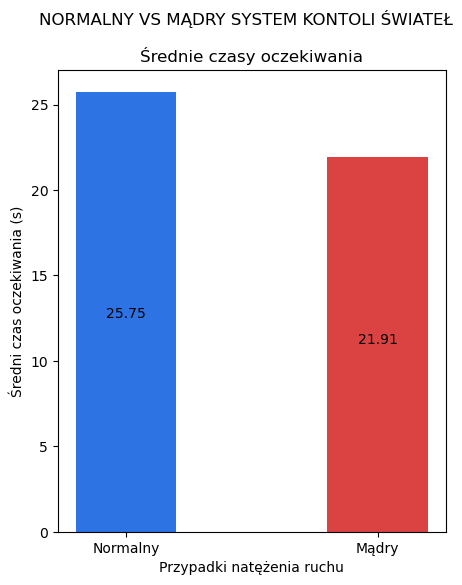

In [386]:


plt.figure(figsize=(5,6))
plt.bar('Normalny', data_norm['avg_wait_time'].mean(), width=0.4, color='#2d73e3')
plt.bar("Mądry", data_cont['avg_wait_time'].mean(), width=0.4, color='#db4242')


plt.text(0, 12.5, 25.75, ha = 'center')
plt.text(1, 11, 21.91, ha = 'center')


plt.xlabel("Przypadki natężenia ruchu") 
plt.ylabel("Średni czas oczekiwania (s)") 
plt.suptitle("NORMALNY VS MĄDRY SYSTEM KONTOLI ŚWIATEŁ")
plt.title("Średnie czasy oczekiwania")

## STAT TEST


In [429]:
avgs = pd.read_csv('avgs.csv')
avgs

,Unnamed: 0,avgs_normal,avgs_control_system
0,0,"[10.533770333694083, 10.000051052833538, 10.23...","[10.240160911651373, 10.092735750785817, 9.882..."
1,1,"[13.427724861524936, 15.924377483938652, 19.76...","[19.80746890126266, 11.752863404598326, 12.860..."
2,2,"[18.994018996598236, 23.05152027002519, 17.439...","[15.80533300682728, 16.56111521720819, 15.2199..."
3,3,"[40.754961434280645, 18.837690199335547, 17.61...","[18.296429946831157, 16.389478042493906, 21.13..."
4,4,"[39.56512608363843, 27.95040763307808, 47.2121...","[25.554413984207862, 40.573174770228135, 29.08..."
5,5,"[47.69671869177019, 54.51017930646089, 73.2835...","[28.795220452049378, 35.69905387772166, 33.544..."


In [433]:
avgs["avgs_normal"] = avgs["avgs_normal"].apply(lambda x: eval(x) if isinstance(x, str) else x)
avgs["avgs_control_system"] = avgs["avgs_control_system"].apply(lambda x: eval(x) if isinstance(x, str) else x)


avgs_long = avgs.explode(["avgs_normal", "avgs_control_system"])


avgs_long = avgs_long.reset_index(drop=True)
avgs_long = avgs_long.drop('Unnamed: 0', axis=1)
pd.set_option('display.max_rows', None)

avgs_long

,avgs_normal,avgs_control_system
0,10.53377,10.240161
1,10.000051,10.092736
2,10.230886,9.882504
3,10.17906,10.271452
4,10.156917,10.854582
5,10.303615,10.535757
6,9.431382,9.812201
7,9.792828,10.776924
8,10.345196,10.91906
9,9.470434,9.871308


In [435]:
avgs_long['avgs_normal'].mean()

26.98386910927776

In [445]:
n =len(avgs_long['avgs_control_system'])
std_n = avgs_long['avgs_normal'].std()
std_cs = avgs_long['avgs_control_system'].std()
mean_n = avgs_long['avgs_normal'].mean()
mean_cs = avgs_long['avgs_control_system'].mean()

In [447]:
t = (mean_n - mean_cs) / np.sqrt(((std_n**2) + (std_cs**2)) / n)
t

2.662911248501602